## シングルニューロンの挙動を見てみる

シグモイド関数は前回の通り。  
まぁ 0 以上 1 以下にして返してくれる関数となっている。

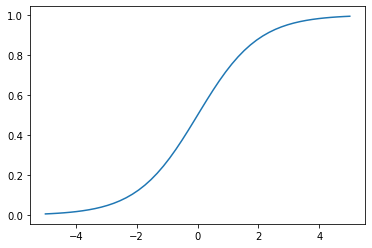

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

で、ニューロンの定義が、活性関数を `f`, データを `x`, 重みを `w`,  バイアスを `b` としたときに

$$
\mu = \sum^{n}_{k=1}{x_k w_k} + b \\
y = f(\mu)
$$

なので、例えば2次元のデータを食わせるとしてこんなデータを用意する

In [2]:
# 食わせるデータサンプル
x_1 = np.arange(-1.0, 1.0, 0.2)
x_2 = np.arange(-1.0, 1.0, 0.2)

X = np.zeros((10, 10, 2))
for i in range(10):
    for j in range(10):
        X[j][i] = np.array([x_1[i], x_2[j]])

データ的にはこんな感じになってるはず。

```
    X = [
        [[-1, -1],   [-0.8, -1] ...   [0.8, -1]],
        [[-1, -0.8], [-0.8, -0.8] ... [0.8, -0.8]],
        ...
    ]
```

なので、単純に足し合わせてヒートマップにすると

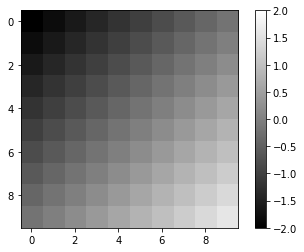

In [3]:
def temp():
    x = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            x[j][i] = sum(X[j][i])
    plt.imshow(x, 'gray', vmin = -2.0, vmax = 2.0)
    plt.colorbar()
    plt.show()

temp()

見たまま黒＝マイナス値 というこんな分布が出来上がる。

で、ニューロンはこうなるはず

In [4]:
def exec_single(w_x, w_y, bias):
    # 結果を食わせるテンポラリデータ
    z = np.zeros((10, 10))

    # x/y 軸で走査
    for i in range(10):
        for j in range(10):
            # x/y に重みを掛けて、バイアスを加える
            u = X[j][i][0] * w_x + X[j][i][1] * w_y + bias
            # その値をシグモイド関数に食わせて
            z[j][i] = sigmoid(u)
    
    # プロットする
    plt.imshow(z, 'gray', vmin = 0.0, vmax = 1.0)
    plt.colorbar()
    plt.show()

で、x, y をそのまま適用して、バイアスを 0.5 にするとこんな感じになる。

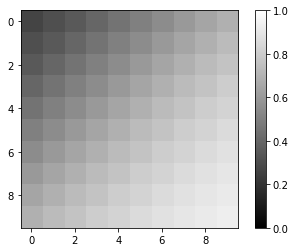

In [5]:
exec_single(w_x = 1, w_y = 1, bias = 1.0)

最小が

$$
  u = -1 + -1 + 1.0 = -1.0 \\
  f(-1.0) = 0.2689414213699951
$$

で座標 `(0, 0)` が黒く染まり

$$
  u = 0.8 + 0.8 + 1.0 = 2.6 \\
  f(2.6) = 0.9308615796566533
$$

ということで座標 `(1, 1)` (右下) になるほど白くなる。

バイアスを削ると全体の値が小さくなるので、心持ち黒くなる

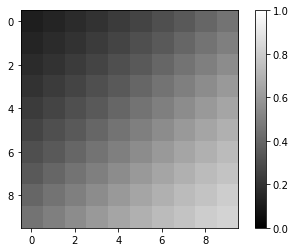

In [6]:
exec_single(w_x = 1, w_y = 1, bias = 0)

Y 軸の重みを 0 (y 軸を評価しない)とすると、X軸だけで重みが決まるので縦線に

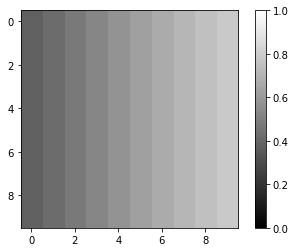

In [7]:
exec_single(w_x = 1, w_y = 0, bias = 0.5)

逆に X 軸を評価外にすれば横線になっていく。  
考えてみれば当然か

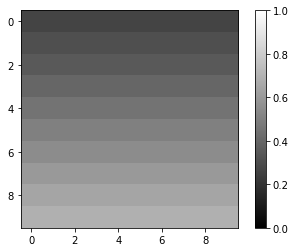

In [8]:
exec_single(w_x = 0, w_y = 1, bias = 0)

## 各階層ニューロンを組み立ててみる

- 中間層: シグモイド関数
- 出力増: 恒等関数※

※ 恒等関数というのは、入力に対して特に何もしない関数のこと

とすると

In [9]:
def middle_func(x, w, b):
    return sigmoid(x.dot(w) + b)


def output_func(x, w, b):
    return x.dot(w) + b

入力層を仮に 2, 中間層 2, 出力層 1 とすると、重み行列は

- 中間層: 2 x 2 行列
- 出力層: 2 x 1 行列

バイアスは = ニューロン数になるので、中間層 2 = 2 個の値、出力層 1 個の値

- 中間層: 2 個の配列
- 出力層: 1 個の配列

とすれば、ドット積で計算できるその上で、重みもバイアスも学習済みと仮定するなら、3層ニューラルネットはこう定義できる。  
とりま出力はグラフにしてみる。

In [10]:
x_1 = np.arange(-1.0, 1.0, 0.2)
x_2 = np.arange(-1.0, 1.0, 0.2)

X = np.zeros((10, 10, 2))
for i in range(10):
    for j in range(10):
        X[j][i] = np.array([x_1[i], x_2[j]])


def exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out):
    Z = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            # 伝播順に
            in_value  = X[j][i]
            mid_value = middle_func(in_value, w_input2middle, b_input2middle)
            out_value = output_func(mid_value, w_middle2out, b_middle2out)

            # で、出力
            Z[j][i] = out_value[0]

    # グラフ化
    plt.imshow(Z, 'gray', vmin=0.0, vmax=1.0)
    plt.colorbar()
    plt.show()

まずは、重み全部 1 (= つまり、x+y の値が直で出力されてる)で、バイアスもなし

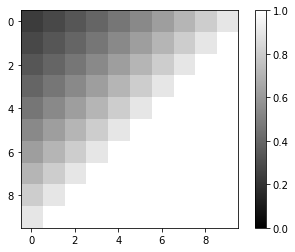

In [11]:
# 重みデータ
w_input2middle = np.array([ # input 2 x middle 2 行列
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([ # middle 2 x out 1 行列
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

出力層のバイアスを増やせば当然明るくなり

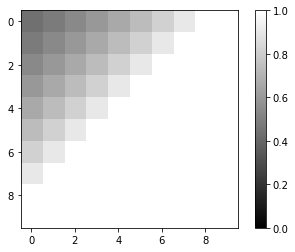

In [12]:
# 重みデータ
w_input2middle = np.array([
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.2])  # 追加

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

中間層バイアスをいじっても明るさが変わる。

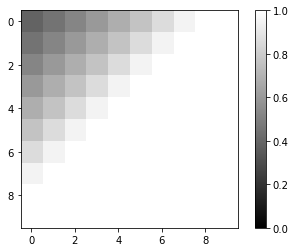

In [13]:
# 重みデータ
w_input2middle = np.array([
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, 1.0]) # 中間層バイアス
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

マイナスのバイアスを入れると勿論暗くなるが、心持ちグラデーションが深くなる

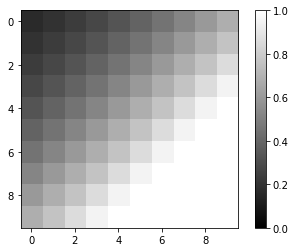

In [14]:
# 重みデータ
w_input2middle = np.array([
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, -1.0]) # 中間層バイアス
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

出力層の重みづけを行うと、全体にかかってくる。

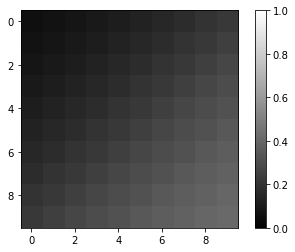

In [15]:
# 重みデータ
w_input2middle = np.array([
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([
    [1.0],
    [-0.5] # 出力層重みづけ
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

重みづけにコントラストをつけると、グラデーションが淡くなった。

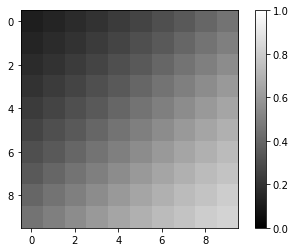

In [16]:
# 重みデータ
w_input2middle = np.array([
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([
    [1.5], # 出力層重みづけ+0.5
    [-0.5] # 出力層重みづけ-1.5
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

出力層のコントラストを逆転すると一気に淡くなる。

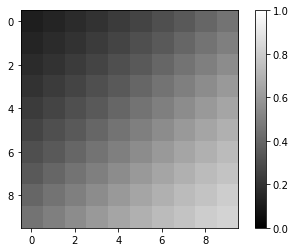

In [17]:
# 重みデータ
w_input2middle = np.array([
    [1.0, 1.0],
    [1.0, 1.0]
])
w_middle2out = np.array([
    [-0.5], # 出力層重みづけ-1.5
    [1.5] # 出力層重みづけ+0.5
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

中間層の重みづけを逆転すると、出力が逆転する。

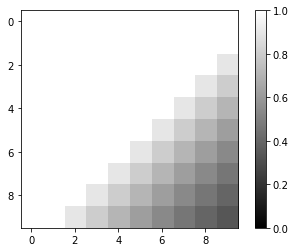

In [18]:
# 重みデータ
w_input2middle = np.array([
    [-1.0, -1.0],
    [-1.0, -1.0]
])
w_middle2out = np.array([
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

中間層の重みづけが大きくなると、コントラストも大きくなる。  
また、ドット積の影響がモロに出るので、濃淡の方向が変わる

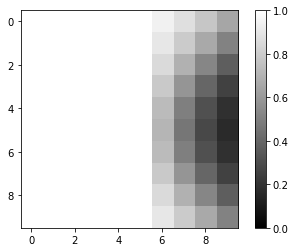

In [19]:
# 重みデータ
w_input2middle = np.array([
    [-3.0, -3.0],
    [3.0, -3.0]
])
w_middle2out = np.array([
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

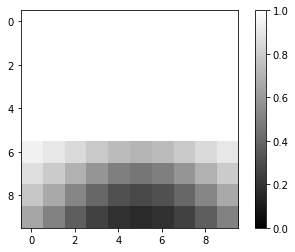

In [20]:
# 重みデータ
w_input2middle = np.array([
    [-3.0, 3.0],
    [-3.0, -3.0]
])
w_middle2out = np.array([
    [1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([0.0, 0.0])
b_middle2out   = np.array([0.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

重みとバイアスの組み合わせで色々な映像になる

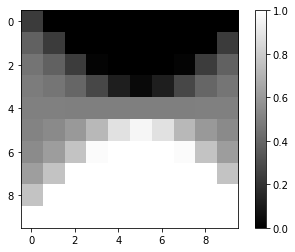

In [21]:
# 重みデータ
w_input2middle = np.array([
    [-5.0, -5.0],
    [5.0, -5.0]
])
w_middle2out = np.array([
    [1.0],
    [-1.0]
])

# バイアス
b_input2middle = np.array([1.0, -1.0])
b_middle2out   = np.array([0.5])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

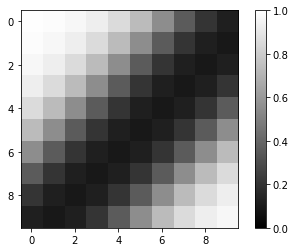

In [22]:
# 重みデータ
w_input2middle = np.array([
    [4.0, 4.0],
    [4.0, 4.0]
])
w_middle2out = np.array([
    [-1.0],
    [1.0]
])

# バイアス
b_input2middle = np.array([3.0, -3.0])
b_middle2out   = np.array([1.0])

# 実行
exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)

**結論: 重みづけとバイアスだけで出力はかなり変わる**

重みづけとバイアスが結局のところ学習するパラメータなので、これを変えるだけで色々な出力に調整できるということが見て取れる。

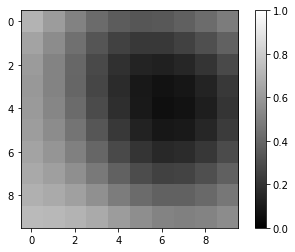

In [23]:
w_input2middle = np.array([
    [1.0, 2.0, -3.0],
    [-3.0, 2.0, 1.0]
])
b_input2middle = np.array([-3.0,-2.0, -1.0])

w_middle2out = np.array([
    [1.0],
    [1.0],
    [1.0]
])
b_middle2out   = np.array([-0.3])

exec_nural(X, w_input2middle, w_middle2out, b_input2middle, b_middle2out)